<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
  Import Libraries
</h1>

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import tensorflow as tfr
from tensorflow.keras.utils import to_categorical
import keras
from keras import layers

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from imblearn.under_sampling import RandomUnderSampler

from IPython.display import display, Image

import torch
from sklearn.utils import resample
from sklearn.datasets import make_classification
from skfeature.function.similarity_based import  fisher_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import keras_tuner
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [224]:
# Using GPU in PyTorch
# Check if CUDA is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
  Loading and Exploring the dataset
</h1>

In [225]:
df = pd.read_csv('star_classification.csv')

In [226]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1237660961327743232.00,135.69,32.49,23.88,22.28,20.40,19.17,18.79,3606,301,2,79,6543777369295181824.00,GALAXY,0.63,5812,56354,171
1,1237664879951151104.00,144.83,31.27,24.78,22.83,22.58,21.17,21.61,4518,301,5,119,11760142036707334144.00,GALAXY,0.78,10445,58158,427
2,1237660961330430208.00,142.19,35.58,25.26,22.66,20.61,19.35,18.95,3606,301,2,120,5152200256025548800.00,GALAXY,0.64,4576,55592,299
3,1237663478724297984.00,338.74,-0.40,22.14,23.78,21.61,20.50,19.25,4192,301,3,214,10301071412954419200.00,GALAXY,0.93,9149,58039,775
4,1237680272041378048.00,345.28,21.18,19.44,17.58,16.50,15.98,15.54,8102,301,3,137,6891864880783316992.00,GALAXY,0.12,6121,56187,842


In [227]:
df.tail()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
99995,1237678879964201472.00,39.62,-2.59,22.17,22.98,21.90,21.31,20.74,7778,301,2,581,10554306253273999360.00,GALAXY,0.00,9374,57749,438
99996,1237679476408647936.00,29.49,19.80,22.69,22.39,20.45,19.76,19.42,7917,301,1,289,8586350850183813120.00,GALAXY,0.40,7626,56934,866
99997,1237668298220634368.00,224.59,15.70,21.17,19.27,18.20,17.69,17.35,5314,301,4,308,3112007759562827776.00,GALAXY,0.14,2764,54535,74
99998,1237661151383454208.00,212.27,46.66,25.35,21.64,19.91,19.07,18.62,3650,301,4,131,7601079570549462016.00,GALAXY,0.46,6751,56368,470
99999,1237661151378801152.00,196.90,49.46,22.62,21.80,20.60,20.01,19.28,3650,301,4,60,8343152349989327872.00,GALAXY,0.54,7410,57104,851


In [228]:
# check for missing values
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [229]:
# check the data types
df.dtypes


obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [230]:
# check the duplicates

df.duplicated().sum()

0

In [231]:
# check the statistical summary

df.describe()


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,1237664721814903296.00,177.63,24.14,21.98,20.53,19.65,19.08,18.67,4481.37,301.00,3.51,186.13,5783882297552056320.00,0.58,5137.01,55588.65,449.31
std,8438559894562.57,96.50,19.64,31.77,31.75,1.85,1.76,31.73,1964.76,0.00,1.59,149.01,3324016169583858176.00,0.73,2952.30,1808.48,272.50
min,1237645942904389888.00,0.01,-18.79,-9999.00,-9999.00,9.82,9.47,-9999.00,109.00,301.00,1.00,11.00,299519089380976640.00,-0.01,266.00,51608.00,1.00
25%,1237659161195119360.00,127.52,5.15,20.35,18.97,18.14,17.73,17.46,3187.00,301.00,2.00,82.00,2844137590766986752.00,0.05,2526.00,54234.00,221.00
50%,1237663463144292864.00,180.90,23.65,22.18,21.10,20.13,19.41,19.00,4188.00,301.00,4.00,146.00,5614883135353542656.00,0.42,4987.00,55868.50,433.00
75%,1237668350286447104.00,233.90,39.90,23.69,22.12,21.04,20.40,19.92,5326.00,301.00,5.00,241.00,8332144107427485696.00,0.70,7400.25,56777.00,645.00
max,1237680531356386304.00,360.00,83.00,32.78,31.60,29.57,32.14,29.38,8162.00,301.00,6.00,989.00,14126940609093851136.00,7.01,12547.00,58932.00,1000.00


In [232]:
# check the details of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
  Visualization of the dataset
</h1>

In [12]:
# Plotting histograms of numeric features to understand their distributions
numeric_features = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']

In [13]:
# Class Distribution Visualization
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df, palette='Set2')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

C:\Users\iot-poweruser\AppData\Local\Temp\ipykernel_13784\1760673117.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='class', y='redshift', data=df, palette='muted')


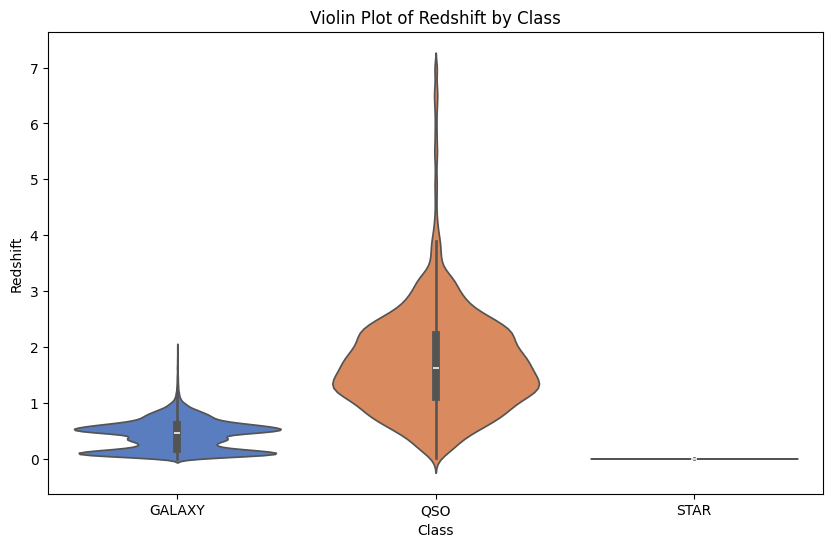

In [234]:
# Violin plots to show the distribution of 'redshift' across different classes
plt.figure(figsize=(10, 6))
sns.violinplot(x='class', y='redshift', data=df, palette='muted')
plt.title('Violin Plot of Redshift by Class')
plt.xlabel('Class')
plt.ylabel('Redshift')
plt.show()

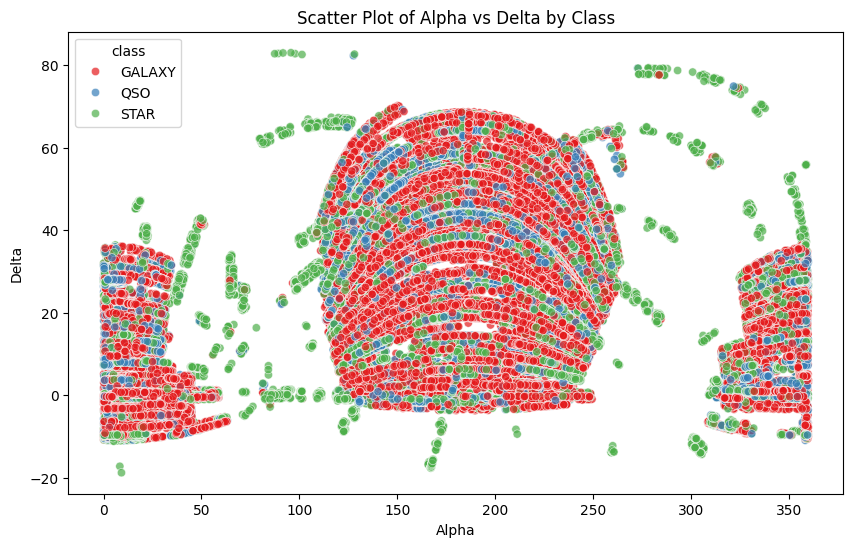

In [235]:
# Investigating the Relationship Between Alpha and Delta - Scatter Plot by Class
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='alpha', y='delta', hue='class', palette='Set1', alpha=0.7)
plt.title("Scatter Plot of Alpha vs Delta by Class")
plt.xlabel('Alpha')
plt.ylabel('Delta')
plt.show()

In [236]:
# Convert the 'class' column to numerical values with LabelEncoder
LE = LabelEncoder()
df['class'] = LE.fit_transform(df['class'])


In [237]:
# check value counts of the rerun_ID column
df['rerun_ID'].value_counts()

rerun_ID
301    100000
Name: count, dtype: int64

In [238]:
# since the rerun_ID has only 1 unique value, it's not useful for our analysis, so we can drop it

df.drop('rerun_ID', axis=1, inplace=True)

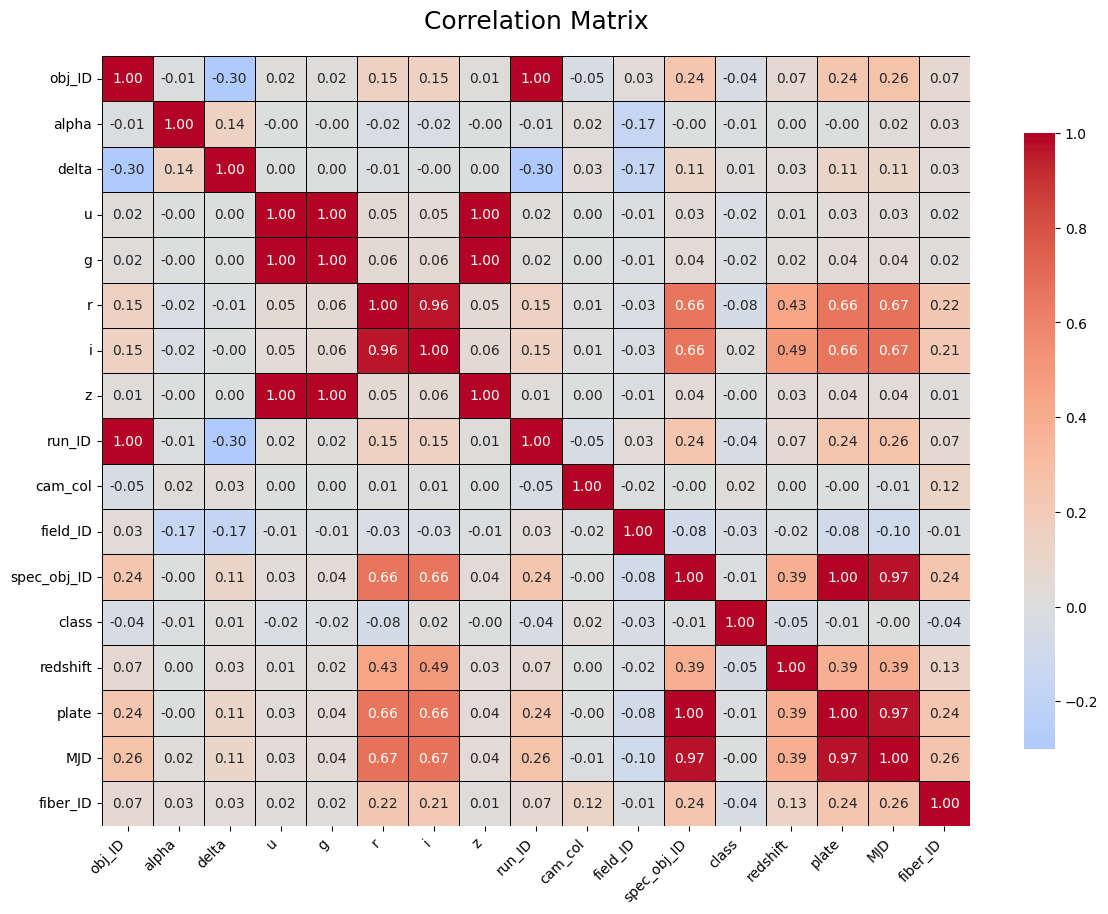

In [239]:
# Correlation Matrix Visualization
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='black', fmt=".2f", cbar_kws={"shrink": 0.8})
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix', fontsize=18, pad=20)
plt.show()

<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
  Data Preprocessing
</h1>

In [240]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1237660961327743232.00,135.69,32.49,23.88,22.28,20.40,19.17,18.79,3606,2,79,6543777369295181824.00,0,0.63,5812,56354,171
1,1237664879951151104.00,144.83,31.27,24.78,22.83,22.58,21.17,21.61,4518,5,119,11760142036707334144.00,0,0.78,10445,58158,427
2,1237660961330430208.00,142.19,35.58,25.26,22.66,20.61,19.35,18.95,3606,2,120,5152200256025548800.00,0,0.64,4576,55592,299
3,1237663478724297984.00,338.74,-0.40,22.14,23.78,21.61,20.50,19.25,4192,3,214,10301071412954419200.00,0,0.93,9149,58039,775
4,1237680272041378048.00,345.28,21.18,19.44,17.58,16.50,15.98,15.54,8102,3,137,6891864880783316992.00,0,0.12,6121,56187,842


In [299]:
# Get the value counts of the 'class' column
df['class'].value_counts()


class
0    59445
2    21594
1    18961
Name: count, dtype: int64

In [300]:
# Create X and y

X = df.drop("class", axis = 1)
y= df["class"]




In [301]:

# Apply RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [302]:
le = LabelEncoder()
y_enc = le.fit_transform(y_resampled)

# Converting the label into a matrix form
y = tf.keras.utils.to_categorical(y_enc)

In [303]:
print("X_train shape:", X.shape)
print("y_train shape:", y.shape)

X_train shape: (100000, 13)
y_train shape: (56883, 3)


In [305]:
df.head()

,alpha,delta,u,g,r,i,z,run_ID,field_ID,class,redshift,plate,MJD,fiber_ID
0,135.69,32.49,23.88,22.28,20.40,19.17,18.79,3606,79,0,0.63,5812,56354,171
1,144.83,31.27,24.78,22.83,22.58,21.17,21.61,4518,119,0,0.78,10445,58158,427
2,142.19,35.58,25.26,22.66,20.61,19.35,18.95,3606,120,0,0.64,4576,55592,299
3,338.74,-0.40,22.14,23.78,21.61,20.50,19.25,4192,214,0,0.93,9149,58039,775
4,345.28,21.18,19.44,17.58,16.50,15.98,15.54,8102,137,0,0.12,6121,56187,842


In [306]:

# convert all continuous variables to integer,
# and convert all negative numbers to 0
X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

# initialize chi2 and SelectKBest
# Note: chi2 -test is a very common test
# in statistics and quantitative analysis
# basically it studies the data whether variables are related
# or independent of each other
chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))

# fit our data to the SelectKBest
best_features = chi_2_features.fit(X_cat,y.astype(int))

# use decimal format in table print later
pd.options.display.float_format = '{:.2f}'.format

# wrap it up, and show the results
# the higher the score, the more effect that column has on price
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

ValueError: Found input variables with inconsistent numbers of samples: [100000, 56883]

In [247]:
# according the table print, three columns are useless so,  I will drop them.
df = df.drop(["cam_col", "obj_ID", "spec_obj_ID"], axis=1)

In [269]:
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [270]:
# save the categories into a list
categories = list(np.unique(df["class"]))
print(categories)

[0, 1, 2]


In [271]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (39818, 16)
y_train shape: (39818,)
X_test shape: (8533, 16)
y_test shape: (8533,)


In [272]:

def build_model(hp):
    # iniatlize sequential test neural network
    model = keras.Sequential()
     # first layer, batch normalization + input shape, same as in typical neural network
     # first layer, batch normalization + input shape, same as in typical neural network
    model.add(layers.BatchNormalization(input_shape=(len(X.columns),)),)
    # add the first actual layer including the regularizer
    model.add(
        layers.Dense(
            # Tune number of units separately.
            units=hp.Int(f"units_0", min_value=8, max_value=64, step=4),
            activation=hp.Choice("activation", ["relu"]),
            kernel_regularizer=keras.regularizers.l1(l1=0.1)
        )
    ) 

    # try additional layers, 1 or 2 extra layers
    for i in range(hp.Int("num_layers", 1, 2)):
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i + 1}", min_value=8, max_value=64, step=4),
                activation=hp.Choice("activation", ["relu"]),
            )
        )

    # output layer, only one node since this is regression
    model.add(layers.Dense(len(categories), activation="softmax"))

    # automate learning rate tests
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")

    # compile the test neural network
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy', metrics=['accuracy']
    )

    return model


# build the model + use RandomSearch to actually search the best options for our neural network
build_model(keras_tuner.HyperParameters())

# use val_loss as the objective, because regression tasks do not have accuracy
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=8,
    executions_per_trial=2,
    overwrite=True,
    directory="optimizations4",
    project_name="classification2test",
)

# start searching
tuner.search(X_train, y_train, epochs=250, validation_data=(X_val, y_val))

Trial 2 Complete [00h 00m 01s]

Best val_accuracy So Far: None
Total elapsed time: 00h 00m 03s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
40                |48                |units_0
relu              |relu              |activation
2                 |2                 |num_layers
44                |44                |units_1
0.00026285        |0.00016823        |lr
32                |8                 |units_2

Epoch 1/250


d:\Deep_Learning\.venv\lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Traceback (most recent call last):
  File "d:\Deep_Learning\.venv\lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "d:\Deep_Learning\.venv\lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "d:\Deep_Learning\.venv\lib\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "d:\Deep_Learning\.venv\lib\site-packages\keras_tuner\src\engine\tuner.py", line 233, in _bu

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "d:\Deep_Learning\.venv\lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "d:\Deep_Learning\.venv\lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "d:\Deep_Learning\.venv\lib\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "d:\Deep_Learning\.venv\lib\site-packages\keras_tuner\src\engine\tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "d:\Deep_Learning\.venv\lib\site-packages\keras_tuner\src\engine\hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
  File "d:\Deep_Learning\.venv\lib\site-packages\keras\src\utils\traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "d:\Deep_Learning\.venv\lib\site-packages\keras\src\backend\tensorflow\nn.py", line 587, in categorical_crossentropy
    raise ValueError(
ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 1), output.shape=(None, 3)


In [256]:
# print out the result and suggestions
tuner.results_summary()

Results summary
Results in optimizations4\classification2test
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
units_0: 8
activation: relu
num_layers: 2
units_1: 40
lr: 0.00046245275333192253
units_2: 8
Score: 0.9464333355426788

Trial 1 summary
Hyperparameters:
units_0: 24
activation: relu
num_layers: 2
units_1: 40
lr: 0.004057212203732938
units_2: 40


In [257]:
# Get the top 2 models.
models = tuner.get_best_models(num_models=2)
best_model = models[0]
best_model.summary()

d:\Deep_Learning\.venv\lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
d:\Deep_Learning\.venv\lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 915 (3.57 KB)

 Trainable params: 883 (3.45 KB)

 Non-trainable params: 32 (128.00 B)

<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Creating neural network structure
</h1>


In [258]:
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(len(X.columns),)),
        layers.Dense(8, activation="relu", kernel_regularizer=keras.regularizers.l1(l1=0.1)),
        layers.Dense(40, activation="relu"),
        layers.Dense(8, activation="relu"),
        layers.Dense(len(categories), activation="softmax")
    ]
)

# Compile the model
learning_rate = 0.0030656  # Best value found for learning rate
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_1           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 40)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 915 (3.57 KB)

 Trainable params: 883 (3.45 KB)

 Non-trainable params: 32 (128.00 B)

In [259]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=100,  
    restore_best_weights=True 
)

In [260]:


history = model.fit(
    X_train,
    y_train,
    epochs=600,  
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping] 
)


Epoch 1/600
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8079 - loss: 1.1150 - val_accuracy: 0.9231 - val_loss: 0.4315
Epoch 2/600
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8912 - loss: 0.3558 - val_accuracy: 0.9327 - val_loss: 0.3484
Epoch 3/600
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8918 - loss: 0.3389 - val_accuracy: 0.9209 - val_loss: 0.5606
Epoch 4/600
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8972 - loss: 0.3185 - val_accuracy: 0.9364 - val_loss: 0.6226
Epoch 5/600
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8961 - loss: 0.3188 - val_accuracy: 0.9246 - val_loss: 0.6448
Epoch 6/600
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8991 - loss: 0.3124 - val_accuracy: 0.9121 - val_loss: 0.4289
Epoch 7/600
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8988 - loss: 0.3132 - val_accuracy: 0.9275 - val_loss: 0.3852
Epoch 8/600
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9016 - loss: 0

<Axes: >

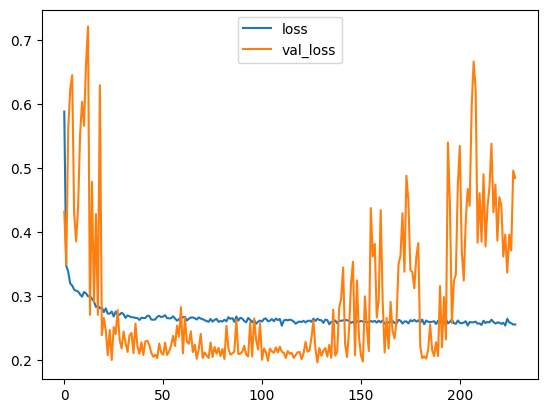

In [261]:
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot()

<Axes: >

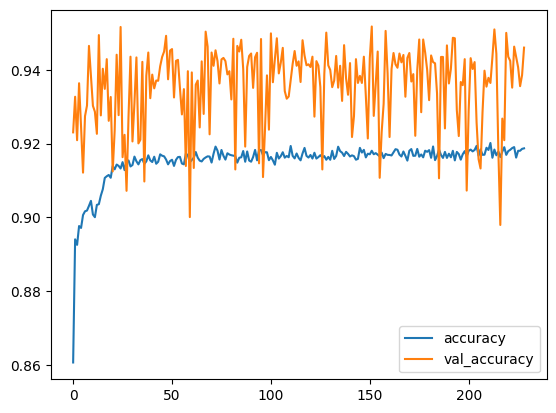

In [262]:
loss_df[['accuracy', 'val_accuracy']].plot()

In [ ]:
# compare the final model loss/accuracy/evaluation values
# the values should again match mostly
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
[3.1102166175842285, 0.7400000095367432]

Train data evaluation:


ValueError: Cannot take the length of shape with unknown rank.

In [265]:
# get predictions and convert with argmax() to get categories 
# instead of raw probabilities
test_predictions = model.predict(X_test)
test_predictions = np.argmax(test_predictions, axis=1)

# convert also y-test -values with argmax
y_test = np.argmax(y_test, axis=1)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [266]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, test_predictions), xticklabels=categories, yticklabels=categories, annot=True, fmt='g')

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and multiclass targets

In [53]:
# Convert categories to strings if they are integers
categories = [str(cat) for cat in categories]
# print the classification report based on true values and predictions
print(classification_report(y_test, test_predictions, target_names=categories))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))


              precision    recall  f1-score   support

           0       0.92      0.86      0.89      2855
           1       0.94      0.93      0.94      2822
           2       0.92      0.98      0.95      2856

    accuracy                           0.93      8533
   macro avg       0.93      0.93      0.93      8533
weighted avg       0.93      0.93      0.93      8533


Model overall accuracy: 92.58%


In [54]:
# get ROC-AUC -score
roc_auc_score(y, model.predict(X), multi_class="ovr")

1778/1778 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


0.9866811504328116